# Loading Data into pandas DataFrame

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('Shakespeare_data.csv')
df=df.dropna().reset_index(drop=True)
df.head()


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


# Feature Engineering First

Here we will first analyze our data.

In [138]:
actsceneline=df['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line
df1=df
df1['act']=actsceneline[0]
df1['scene']=actsceneline[1]
df1['line']=actsceneline[2]
df1['words_lines']=[len(i.split(' ')) for i in df1['PlayerLine']]
df1=df1.drop('PlayerLine',axis=1)
for i in df1.columns.values:
    df1[str(i)]=df1[str(i)].astype('category')

In [140]:
df1.head()

,Play,PlayerLinenumber,ActSceneLine,Player,act,scene,line,words_lines
0,Henry IV,1.0,1.1.1,KING HENRY IV,1,1,1,9
1,Henry IV,1.0,1.1.2,KING HENRY IV,1,1,2,9
2,Henry IV,1.0,1.1.3,KING HENRY IV,1,1,3,7
3,Henry IV,1.0,1.1.4,KING HENRY IV,1,1,4,7
4,Henry IV,1.0,1.1.5,KING HENRY IV,1,1,5,8


In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lenc=LabelEncoder()
dict_numeric={}
for i in df1.columns:
    key=i
    value=lenc.fit_transform(df1[i])
    dict_numeric[key]=value
df_numeric=pd.DataFrame.from_dict(dict_numeric)

In [146]:
df_stats = pd.DataFrame(columns = ['column', 'values', 'count'])
tmp = pd.DataFrame()

for c in df_objects.columns:
    tmp['column'] = [c]
    tmp['values'] = [df1[c].unique()]
    tmp['count'] = len(list(df1[c].unique()))
    df_stats = df_stats.append(tmp)
df_stats

,column,values,count
0,Play,"[Henry IV, Henry VI Part 1, Henry VI Part 2, H...",36
0,PlayerLinenumber,"[1.0, 2.0, 3.0, 4.0, 5.0, ..., 401.0, 402.0, 4...",405
0,Player,"[KING HENRY IV, WESTMORELAND, FALSTAFF, PRINCE...",934
0,act,"[1, 2, 3, 4, 5, 0] Categories (6, object): [1,...",6
0,scene,"[1, 2, 3, 4, 5, ..., 12, 13, 14, 15, 0] Length...",16
0,line,"[1, 2, 3, 4, 5, ..., 967, 968, 969, 970, 971] ...",971
0,words_lines,"[9, 7, 8, 6, 5, ..., 26, 35, 39, 38, 56] Lengt...",42


In [148]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(df_numeric)
DATA1= pd.DataFrame((est.transform(df_numeric)),columns=df_numeric.columns.values)
DATA1

,Play,PlayerLinenumber,ActSceneLine,Player,act,scene,line,words_lines
0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0
1,2.0,0.0,0.0,4.0,2.0,0.0,1.0,1.0
2,2.0,0.0,0.0,4.0,2.0,0.0,2.0,1.0
3,2.0,0.0,0.0,4.0,2.0,0.0,3.0,1.0
4,2.0,0.0,0.0,4.0,2.0,0.0,4.0,1.0
5,2.0,0.0,0.0,4.0,2.0,0.0,5.0,1.0
6,2.0,0.0,0.0,4.0,2.0,0.0,6.0,1.0
7,2.0,0.0,0.0,4.0,2.0,0.0,8.0,1.0
8,2.0,0.0,0.0,4.0,2.0,0.0,9.0,1.0
9,2.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0


In [129]:
df_stats.sort_values(by = 'count', inplace = True, ascending = True)
df_stats=df_stats.set_index('column')
df_stats

,values,count
column,,
act,"[1, 2, 3, 4, 5, 0] Categories (6, object): [1,...",6
scene,"[1, 2, 3, 4, 5, ..., 12, 13, 14, 15, 0] Length...",16
Play,"[Henry IV, Henry VI Part 1, Henry VI Part 2, H...",36
words_lines,"[9, 7, 8, 6, 5, ..., 26, 35, 39, 38, 56] Lengt...",42
PlayerLinenumber,"[1.0, 2.0, 3.0, 4.0, 5.0, ..., 401.0, 402.0, 4...",405
Player,"[KING HENRY IV, WESTMORELAND, FALSTAFF, PRINCE...",934
line,"[1, 2, 3, 4, 5, ..., 967, 968, 969, 970, 971] ...",971


Play
PlayerLinenumber
ActSceneLine
Player
act
scene
line
words_lines


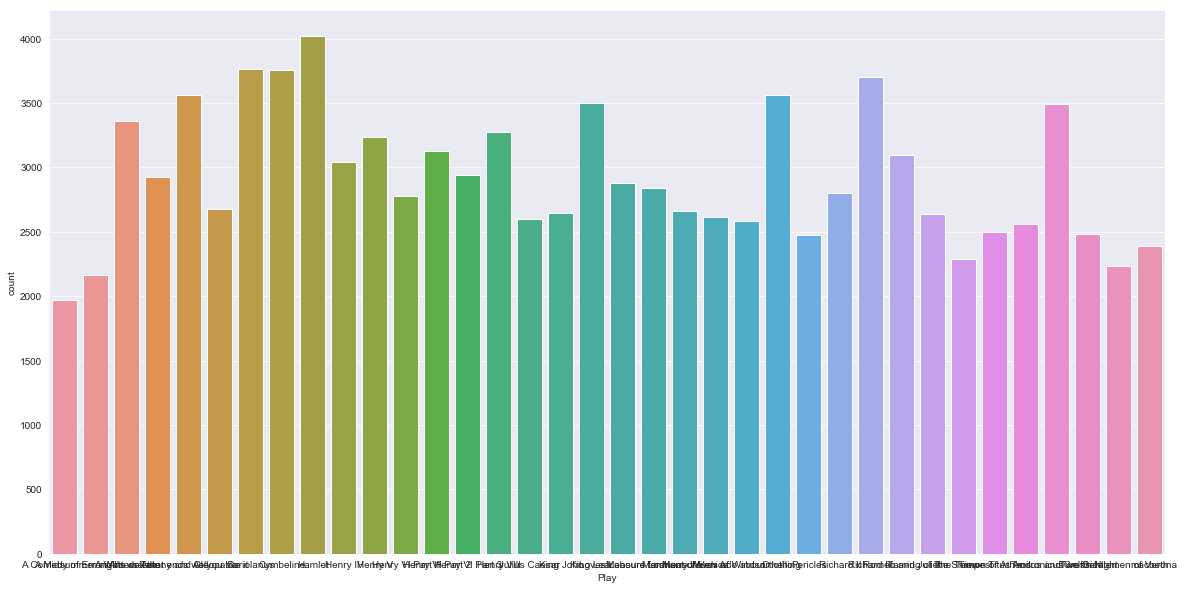

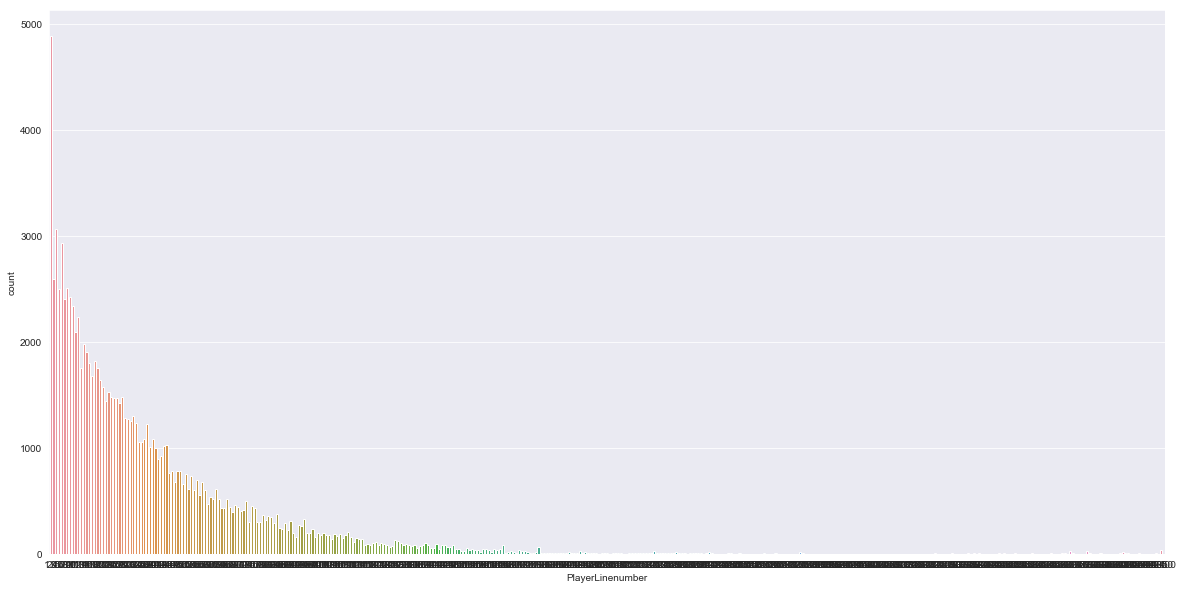

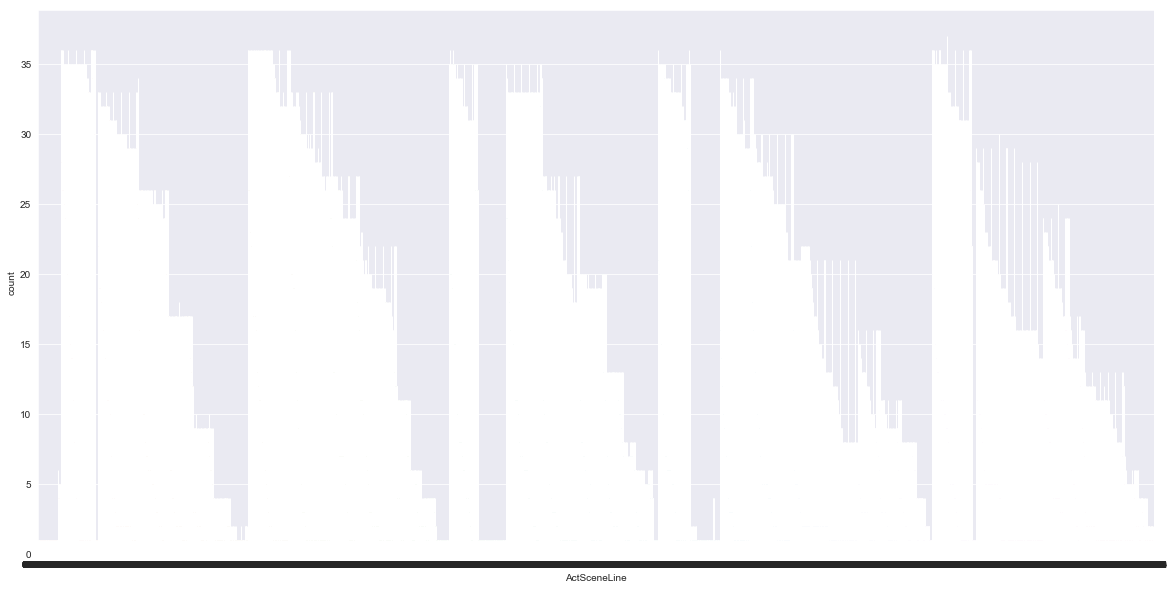

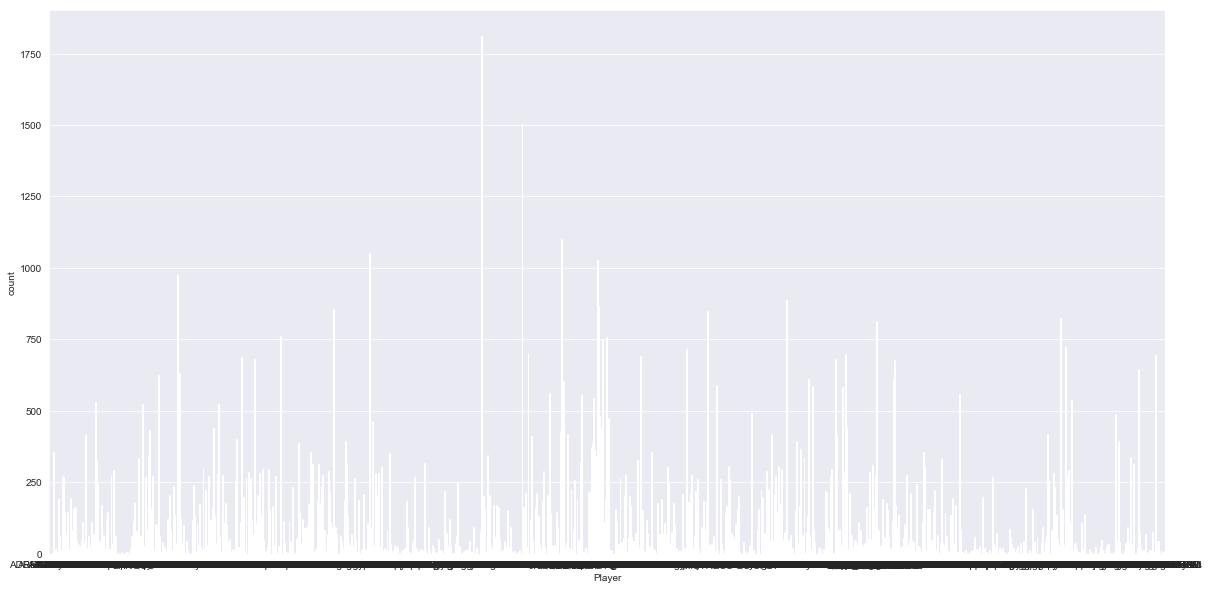

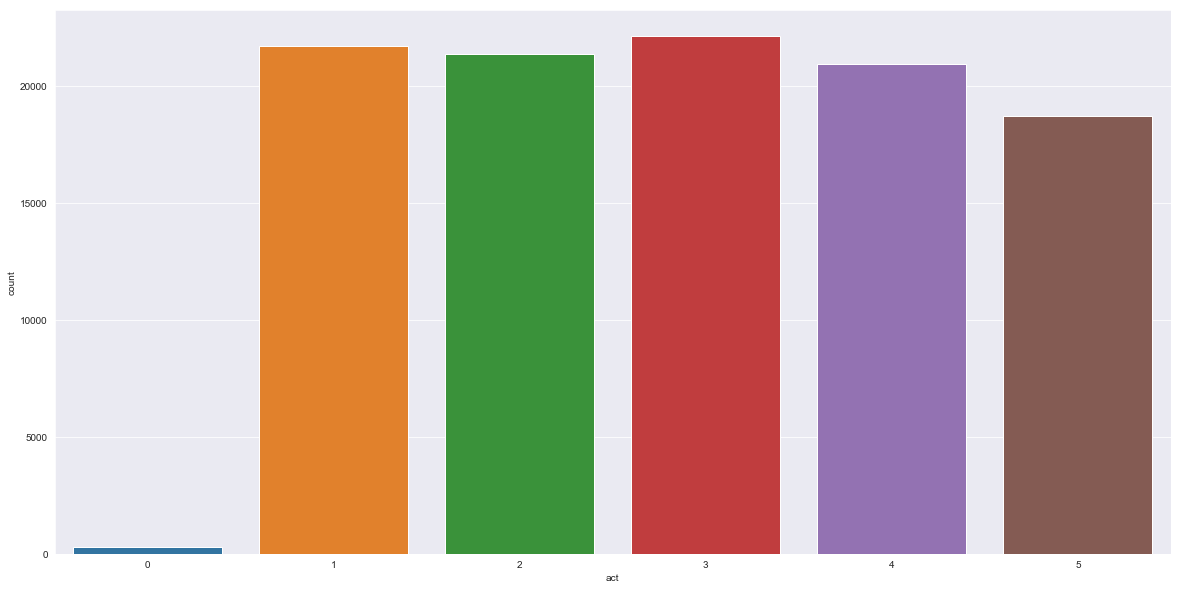

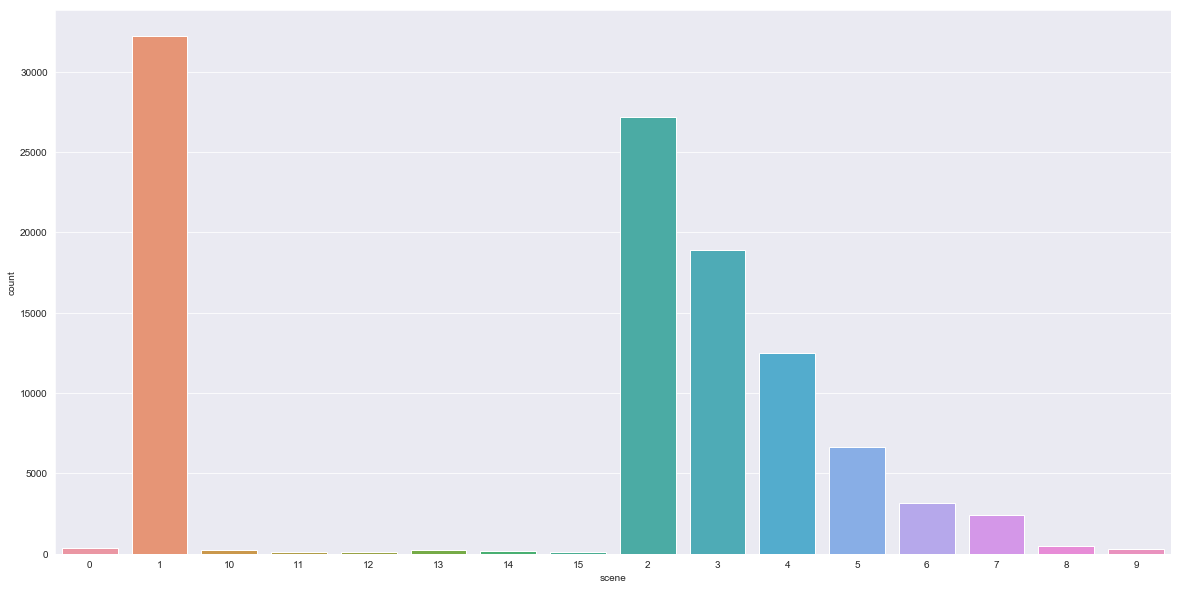

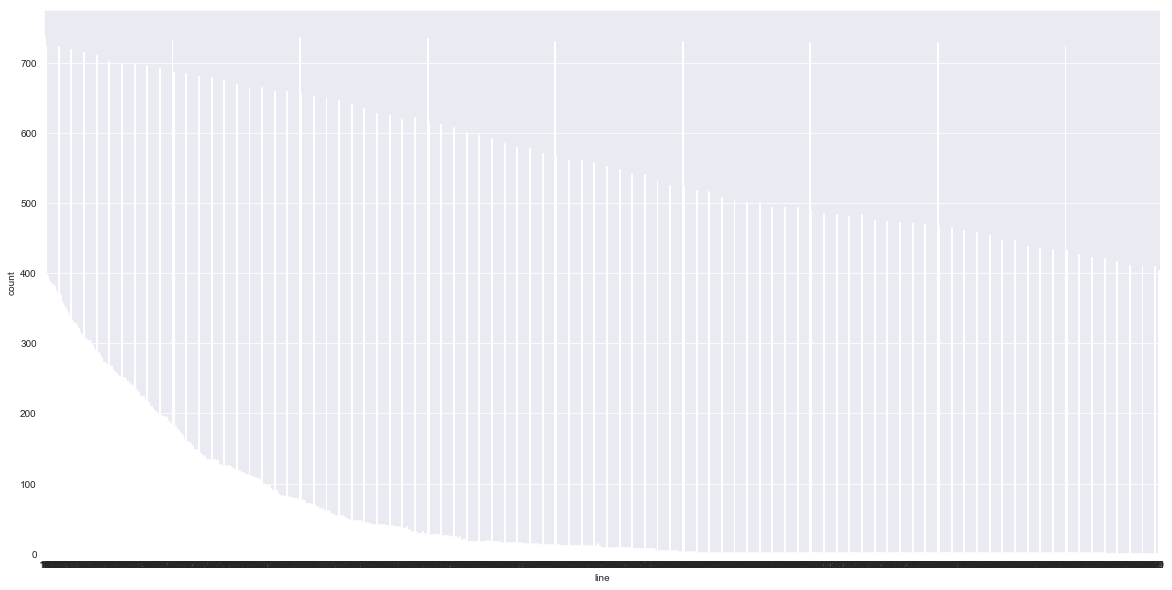

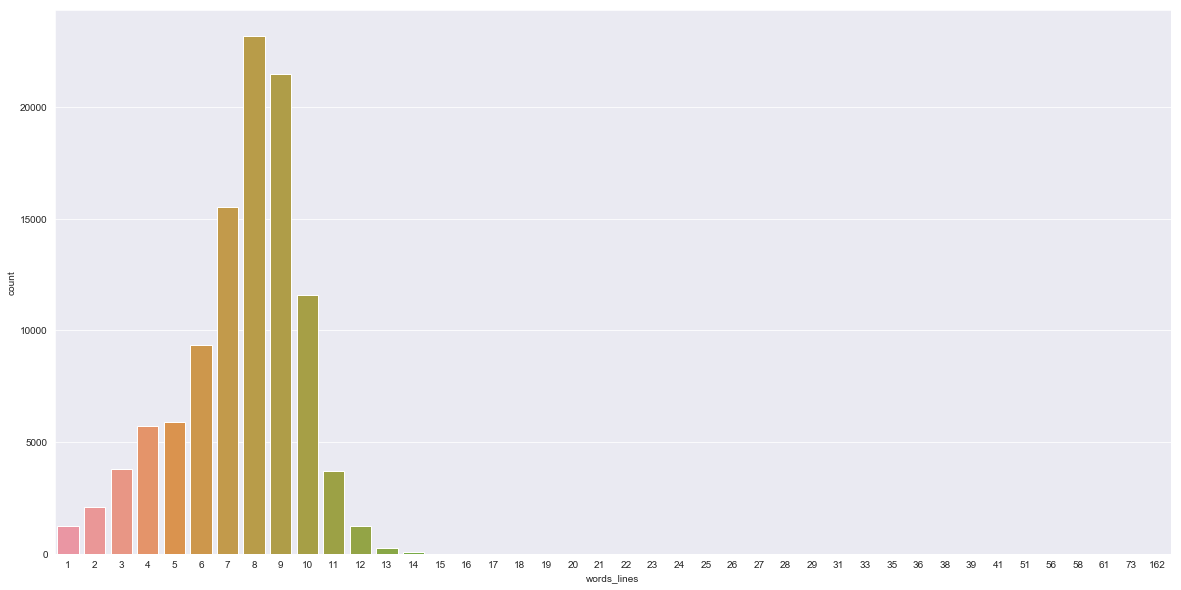

<Figure size 1440x720 with 0 Axes>

In [149]:
ix = 1
fig = plt.figure(figsize = (20,10))
for c in list(df1.columns):
    if ix <= 3:
            print(c)
            ax1 = fig.add_subplot(1,1,ix)
            sns.countplot(data = df1, x=c, ax = ax1)
            
    ix = ix +1
    if ix == 2: 
        fig = plt.figure(figsize = (20,10))
        ix =1

We are going to count the length of each line spoken so that we could combine later to see how many words are actually spoken by each player or infact in each play. We are going to remove the Player line column as well it doesnt add any significant value except that we already have the length of each line spoken.

Our Data Set is almost ready. please dont get confused with the numbers. They should never be treated as numerics but as strings or categorical variables. We are going to manipulate these numbers to get the count and that will be something thats we can make analysis on. Thats why we have converted all the columns above into categorical data

# This is the actual method for connverting the non-numerical data into numerical data.
What this method will do is basically convert the each column into an array and for the unique items in that particular
column, it will convert into particular index untill all unique words occur in the column. After that it will simply assign
the corresponding element index. 

In [63]:
import numpy as np
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df
df2=handle_non_numerical_data(df1)

In [65]:
df1.head()
AB=df1.columns.values
DATA2=df1

In [87]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(DATA2)
DATA1= pd.DataFrame((est.transform(DATA2)),columns=AB)

In [83]:
from sklearn import preprocessing
array1=preprocessing.normalize(DATA1)
normal_df=pd.DataFrame(array1).head()
normal_df.columns=DATA1.columns
normal_df.head()

,Play,PlayerLinenumber,Player,act,scene,line,words_lines
0,0.0,0.0,0.0,0.485071,0.485071,0.727607,0.0
1,0.0,0.0,0.0,0.577350,0.577350,0.577350,0.0
2,0.0,0.0,0.0,0.707107,0.707107,0.000000,0.0
3,0.0,0.0,0.0,0.707107,0.707107,0.000000,0.0
4,0.0,0.0,0.0,0.666667,0.666667,0.333333,0.0


Now We are going to import all important libraries we need to make our EDA. 

In [84]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn=ignore_warn

import os 
print(os.listdir('.'))

['.ipynb_checkpoints', 'alllines.txt', 'NAIVEBAISE.ipynb', 'shakespeare-plays.zip', 'Shakespeare_data.csv', 'Shakspeare.ipynb', 'william-shakespeare-black-silhouette.jpg']


,Play,PlayerLinenumber,Player,act,scene,line,words_lines
Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlayerLinenumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act,NaN,NaN,NaN,1.000000,1.000000,-0.954873,NaN
scene,NaN,NaN,NaN,1.000000,1.000000,-0.954873,NaN
line,NaN,NaN,NaN,-0.954873,-0.954873,1.000000,NaN
words_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN


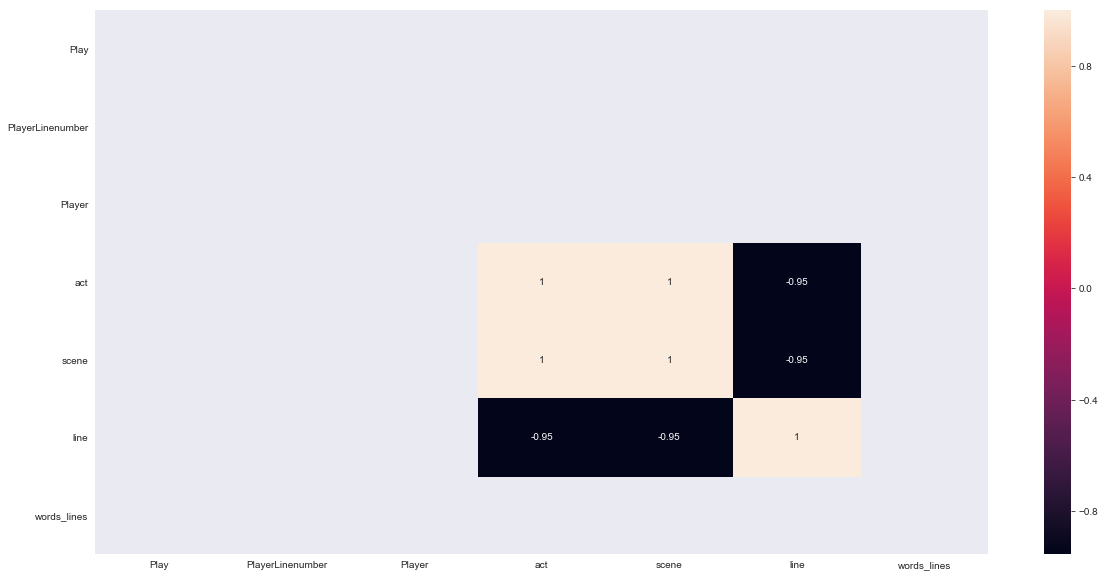

In [ ]:
"""
This is the actual method for connverting the non-numerical data into numerical data.
What this method will do is basically convert the each column into an array and for the unique items in that particular
column, it will convert into particular index untill all unique words occur in the column. After that it will simply assign
the corresponding element index. 
"""
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df
df=handle_non_numerical_data(df)

# Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis

First lets all important libraries we need

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn=ignore_warn

import os 
print(os.listdir('.'))

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,annot=True)
corrmat